In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
### Normalizing the features
def normalize_features(X, mean=None, std=None):
    if mean is None:
        mean = np.mean(X, axis=0)
    if std is None:
        std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std


In [ ]:
### Compute the cost function for linear regression.
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost


In [ ]:
### Compute the cost function for Ridge regression.
def compute_ridge_cost(X, y, theta, lambda_):
    m = len(y)
    h = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2) + (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    return cost

In [ ]:
### Perform gradient descent to minimize the cost function.
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = X.dot(theta)
        theta = theta - (alpha / m) * (X.T.dot(h - y))
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history


In [ ]:
### Perform linear regression using gradient descent.
def linear_regression(X, y, alpha, num_iterations):
    X, mean, std = normalize_features(X)
    # Add a column of ones for the intercept term
    X = np.insert(X, 0, 1, axis=1)
    theta = np.zeros(X.shape[1])
    theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

    return theta, mean, std, cost_history


In [ ]:
### Perform ridge regression using gradient descent.
def ridge_regression(X, y, alpha, lambda_, num_iterations):
    X, mean, std = normalize_features(X)
    # Add a column of ones for the intercept term
    X = np.insert(X, 0, 1, axis=1)

    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(num_iterations):
        h = X.dot(theta)
        theta[0] = theta[0] - (alpha / m) * (X[:, 0].dot(h - y))
        theta[1:] = theta[1:] * (1 - alpha * lambda_ / m) - (alpha / m) * (X[:, 1:].T.dot(h - y))
        cost = compute_ridge_cost(X, y, theta, lambda_)
        cost_history.append(cost)

    return theta, mean, std, cost_history

In [ ]:
### Make predictions on unseen data.
def predict(X, theta, mean, std):
    X_norm, _, _ = normalize_features(X, mean, std)
    # Add a column of ones for the intercept term
    X_norm = np.insert(X_norm, 0, 1, axis=1)
    predictions = X_norm.dot(theta)
    return predictions


In [ ]:
# Example

X_train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y_train = np.array([4, 7, 10])
print(X_train)

alpha = 0.01  # learning rate
lambda_ = 0.1
num_iterations = 1000

theta, mean, std, cost_history = linear_regression(X_train, y_train, alpha, num_iterations)

X_test = np.array([[2, 4, 6], [3, 5, 7]])
y_test = np.array([5, 8])

predictions = predict(X_test, theta, mean, std)

print("Theta:", theta)
print("Predictions:", predictions)

print(X_test.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Theta: [6.9996978  0.81649658 0.81649658 0.81649658]
Predictions: [5.9996978 6.9996978]
(2, 3)


In [ ]:
theta, mean, std, cost_history = ridge_regression(X_train, y_train, alpha, lambda_, num_iterations)
predictions = predict(X_test, theta, mean, std)

print("Theta:", theta)
print("Predictions:", predictions)

Theta: [6.9996978  0.80752409 0.80752409 0.80752409]
Predictions: [6.01068681 6.9996978 ]


In [ ]:
# Loading the housing dataset as a dataframe.
housing_data = pd.read_csv("housing.csv")
print(housing_data.shape)
print(housing_data.head())
print(housing_data.isnull().sum(axis=0))

(20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude               0
latitude                0
housing_med

In [ ]:
# Hardly 1 percent of the rows have missing values. So dropping those rows would not have much impact.
housing_data = housing_data.dropna()
print(housing_data.shape)
print(housing_data.head())
print(housing_data.isnull().sum(axis=0))

(20433, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude             0
latitude              0
housing_median_

In [ ]:
# Encoding the categorical column using OneHotEncoder
encoder = ce.OneHotEncoder(cols='ocean_proximity',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data = encoder.fit_transform(housing_data)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_NEAR BAY,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Setting median_income column as target column.
y = data.iloc[:, 8]
# Dropping longitude and latitude columns, as the numerical values of longitude and latitude are not significant.
data.drop(data.columns[[0, 1, 8]], axis=1, inplace=True)
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_NEAR BAY,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
0,41.0,880.0,129.0,322.0,126.0,8.3252,1.0,0.0,0.0,0.0,0.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1.0,0.0,0.0,0.0,0.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,1.0,0.0,0.0,0.0,0.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,1.0,0.0,0.0,0.0,0.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,1.0,0.0,0.0,0.0,0.0


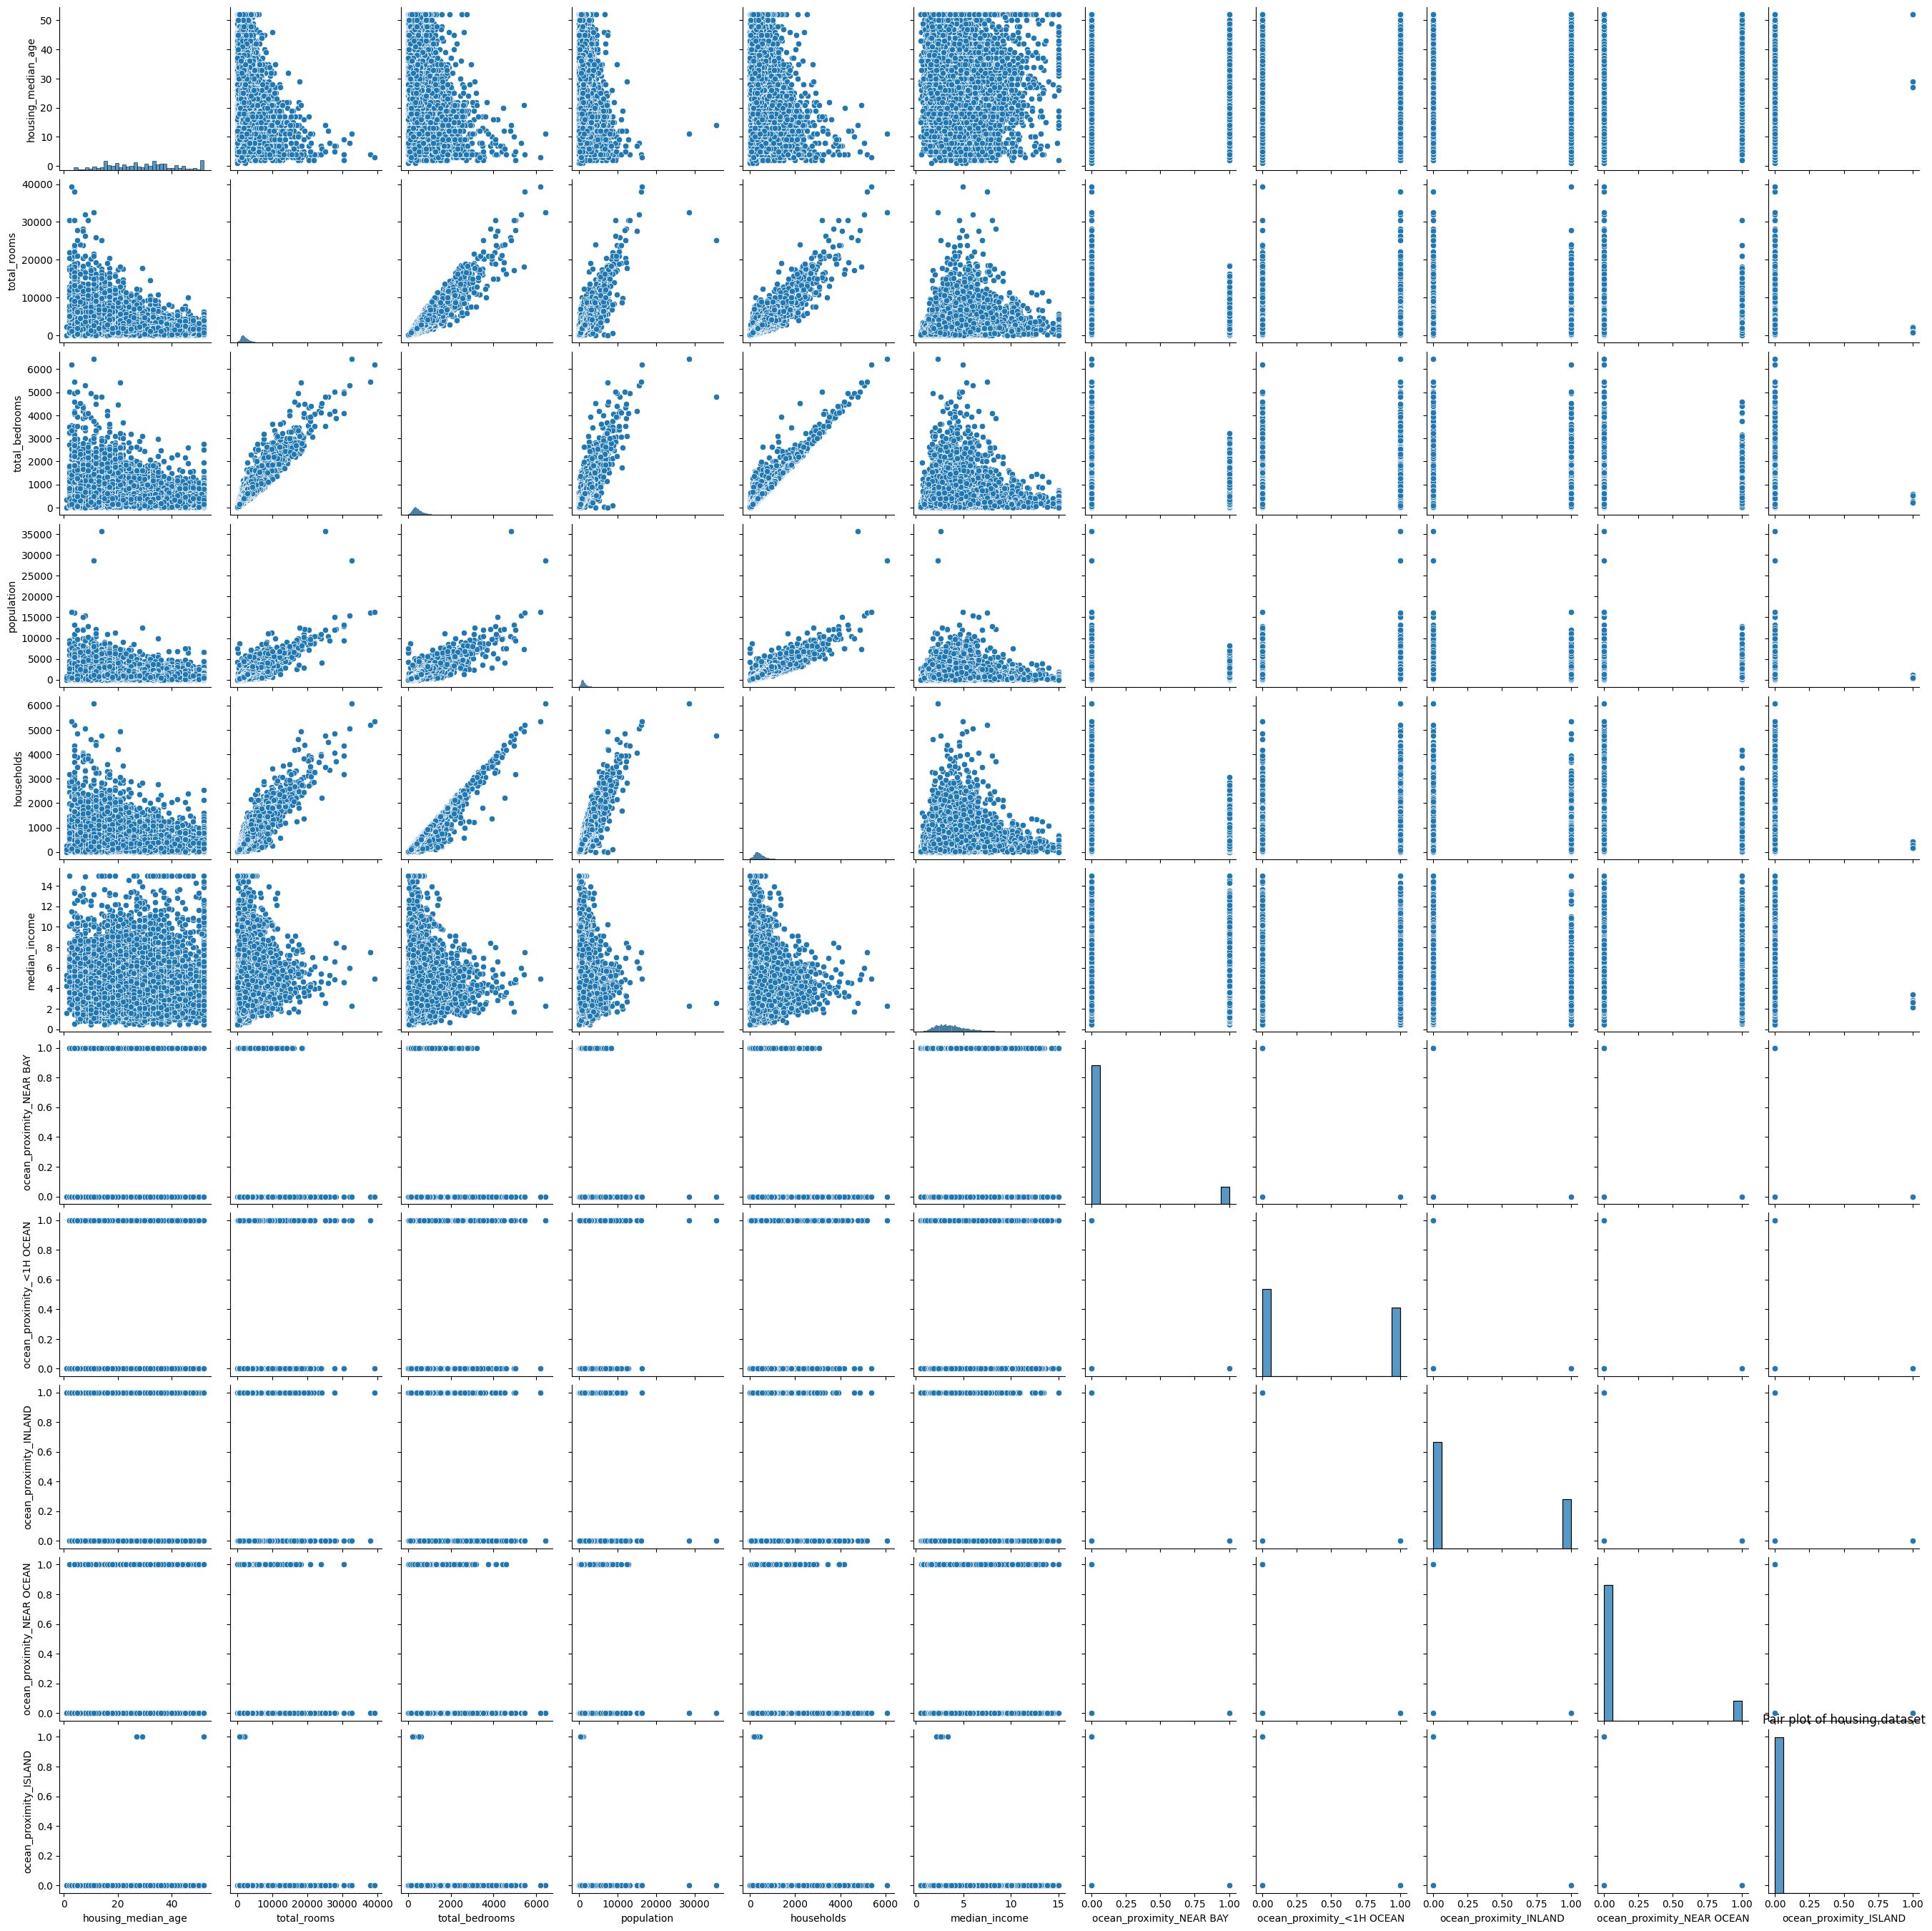

In [ ]:
# Exploratory data analysis
sns.pairplot(data)
plt.title('Pair plot of housing dataset')
plt.show()

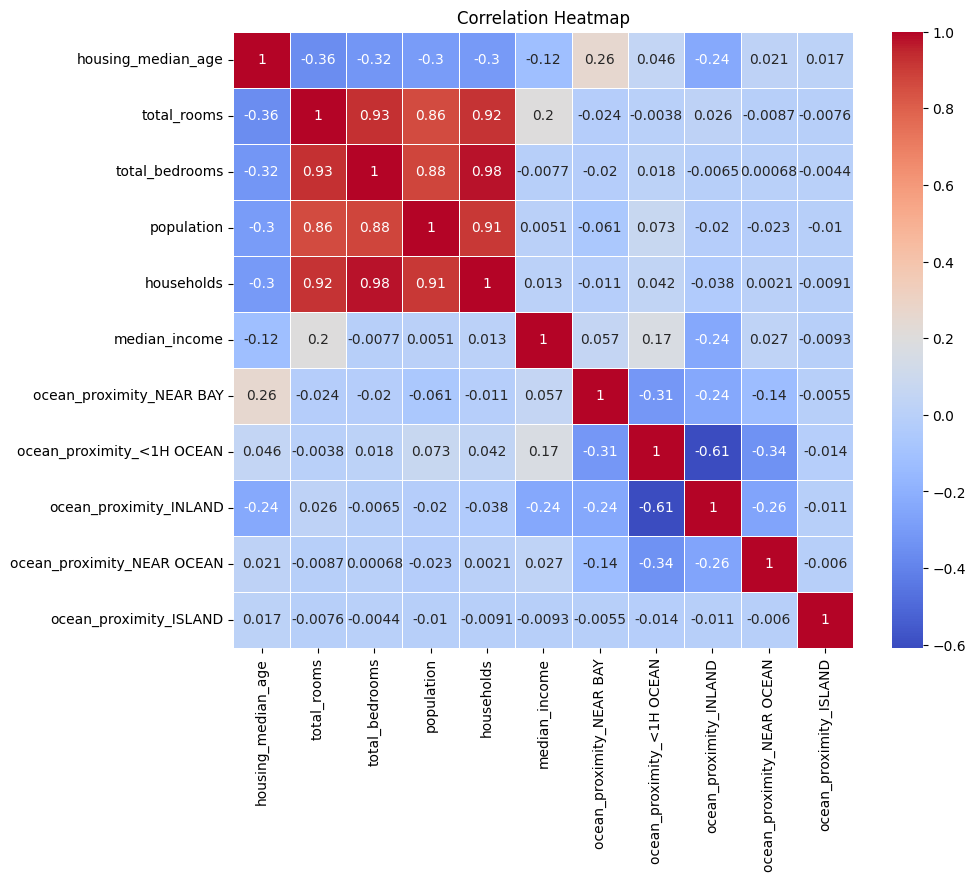

In [ ]:
# Correlation heatmap to check feature correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

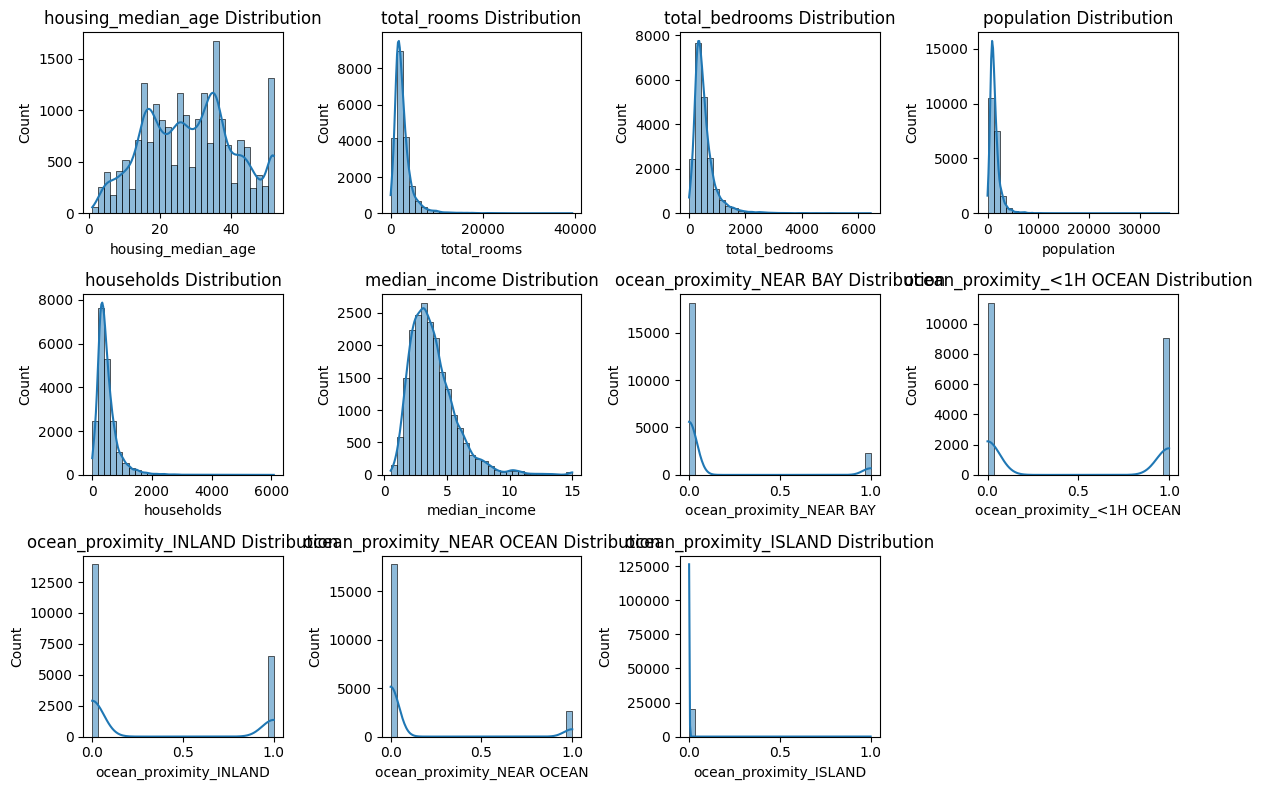

In [ ]:
# Histograms of each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data.columns.values.tolist()):
    plt.subplot(3, 4, i+1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# Splitting the data into train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20)

# Splitting the data into train and validation datasets.
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20)

In [ ]:
# Define hyperparameter search space
alphas = [0.001, 0.01, 0.1]
lambdas = [0.001, 0.01, 0.1, 1.0]
num_iterations = [10, 100, 1000]

In [ ]:
# Finding the best hyperparameters
for alpha in alphas:
  for num_iteration in num_iterations:
    theta, mean, std, cost_history = linear_regression(X_train.to_numpy(), y_train.to_numpy(), alpha, num_iteration)
    y_pred = predict(X_validation.to_numpy(), theta, mean, std)
    r2 = r2_score(y_validation, y_pred)
    print(f'The R2 score of the linear regression model with alpha: {alpha} and number of iterations: {num_iteration} = {r2}')


The R2 score of the linear regression model with alpha: 0.001 and number of iterations: 10 = -3.1516521427549593
The R2 score of the linear regression model with alpha: 0.001 and number of iterations: 100 = -2.491675741243665
The R2 score of the linear regression model with alpha: 0.001 and number of iterations: 1000 = 0.1404641314263022
The R2 score of the linear regression model with alpha: 0.01 and number of iterations: 10 = -2.48835626135932
The R2 score of the linear regression model with alpha: 0.01 and number of iterations: 100 = 0.14500026893030116
The R2 score of the linear regression model with alpha: 0.01 and number of iterations: 1000 = 0.6384027477681624
The R2 score of the linear regression model with alpha: 0.1 and number of iterations: 10 = 0.19092121688394226
The R2 score of the linear regression model with alpha: 0.1 and number of iterations: 100 = 0.6384318098689055
The R2 score of the linear regression model with alpha: 0.1 and number of iterations: 1000 = 0.6436196

In [ ]:
# Testing the linear regression model with the best hyperparameters on test data.
theta, mean, std, cost_history = linear_regression(X_train.to_numpy(), y_train.to_numpy(), 0.1, 1000)

# Predicting the values of test data
y_pred = predict(X_test.to_numpy(), theta, mean, std)

# Evaluating the model
r2 = r2_score(y_test, y_pred)

# Printing the results
print("R2 score of the model with best hyperparameters on test data = ", r2)

R2 score of the model with best hyperparameters on test data =  0.625966271812725


In [ ]:
# Finding the best hyperparameters
for alpha in alphas:
  for lambda_ in lambdas:
    for num_iteration in num_iterations:
      theta, mean, std, cost_history = ridge_regression(X_train.to_numpy(), y_train.to_numpy(), alpha, lambda_, num_iteration)
      y_pred = predict(X_validation.to_numpy(), theta, mean, std)
      r2 = r2_score(y_validation, y_pred)
      print(f'The R2 score of the ridge regression model with alpha: {alpha}, lambda: {lambda_}, and number of iterations: {num_iteration} = {r2}')

The R2 score of the linear regression model with alpha: 0.001, lambda: 0.001, and number of iterations: 10 = -3.1516521427611153
The R2 score of the linear regression model with alpha: 0.001, lambda: 0.001, and number of iterations: 100 = -2.4916757417826885
The R2 score of the linear regression model with alpha: 0.001, lambda: 0.001, and number of iterations: 1000 = 0.14046412451978207
The R2 score of the linear regression model with alpha: 0.001, lambda: 0.01, and number of iterations: 10 = -3.151652142816526
The R2 score of the linear regression model with alpha: 0.001, lambda: 0.01, and number of iterations: 100 = -2.491675746633902
The R2 score of the linear regression model with alpha: 0.001, lambda: 0.01, and number of iterations: 1000 = 0.14046406236104547
The R2 score of the linear regression model with alpha: 0.001, lambda: 0.1, and number of iterations: 10 = -3.151652143370626
The R2 score of the linear regression model with alpha: 0.001, lambda: 0.1, and number of iteration

In [ ]:
# Testing the ridge regression model with the best hyperparameters on test data.
theta, mean, std, cost_history = ridge_regression(X_train.to_numpy(), y_train.to_numpy(), 0.1, 1.0, 1000)

# Predicting the values of test data
y_pred = predict(X_test.to_numpy(), theta, mean, std)

# Evaluating the model
r2 = r2_score(y_test, y_pred)

# Printing the results
print("R2 score of the model with best hyperparameters on test data = ", r2)

R2 score of the model with best hyperparameters on test data =  0.6259909921891158


In [ ]:
# Adding new features to the dataset whose values are the exponential values of the existing feature values.
def add_polynomial_features(X, max_degree):
    # Add polynomial features up to the specified degree.
    X_poly = X.copy()
    for d in range(2, max_degree+1):
        X_poly = np.hstack((X_poly, X**d))
    return X_poly

In [ ]:
X_train_poly = add_polynomial_features(X_train, 2)
X_validation_poly = add_polynomial_features(X_validation, 2)
X_test_poly = add_polynomial_features(X_test, 2)

In [ ]:
# Finding the best hyperparameters for polynomial regression model
for alpha in alphas:
  for lambda_ in lambdas:
    for num_iteration in num_iterations:
      theta, mean, std, cost_history = ridge_regression(X_train_poly, y_train.to_numpy(), alpha, lambda_, num_iteration)
      y_pred = predict(X_validation_poly, theta, mean, std)
      r2 = r2_score(y_validation, y_pred)
      print(f'The R2 score of the polynomial regression model with alpha: {alpha}, lambda: {lambda_}, and number of iterations: {num_iteration} = {r2}')

The R2 score of the polynomial regression model with alpha: 0.001, lambda: 0.001, and number of iterations: 10 = -3.135311245319083
The R2 score of the polynomial regression model with alpha: 0.001, lambda: 0.001, and number of iterations: 100 = -2.382255284310509
The R2 score of the polynomial regression model with alpha: 0.001, lambda: 0.001, and number of iterations: 1000 = 0.16690753224580535
The R2 score of the polynomial regression model with alpha: 0.001, lambda: 0.01, and number of iterations: 10 = -3.1353112454237735
The R2 score of the polynomial regression model with alpha: 0.001, lambda: 0.01, and number of iterations: 100 = -2.382255291740323
The R2 score of the polynomial regression model with alpha: 0.001, lambda: 0.01, and number of iterations: 1000 = 0.16690751696833372
The R2 score of the polynomial regression model with alpha: 0.001, lambda: 0.1, and number of iterations: 10 = -3.135311246470673
The R2 score of the polynomial regression model with alpha: 0.001, lambd

In [ ]:
# Training the Polynomial regression model with the train data
X_train_poly = add_polynomial_features(X_train, 2)
theta, mean, std, cost_history = ridge_regression(X_train_poly, y_train.to_numpy(), 0.1, 0.0001, 1000)

# Predicting the values of test data
X_test_poly = add_polynomial_features(X_test, 2)
y_pred = predict(X_test_poly, theta, mean, std)

# Evaluating the model
r2 = r2_score(y_test, y_pred)

# Printing the results
print("R2 score of the polynomial regression model with best hyperparameters = ", r2)

R2 score of the polynomial regression model with best hyperparameters =  0.640655144194431
